In [115]:
# All the libraries you'll need( probably)
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline



In [116]:
df = pd.read_csv(r"reduced_col.csv",index_col=[0])

In [117]:
df.head()

,gender,body.temperature,pulse,respiration,map,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,...,methemoglobin,chloride.ion,glucose.blood.gas,lactate,carboxyhemoglobin,oxygen.saturation,partial.oxygen.pressure,anion.gap,free.calcium,ageCat
0,0.0,0.271429,0.333333,0.500000,0.428309,0.046006,1.0,1.0,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
1,0.0,0.142857,0.363636,0.583333,0.569853,0.053564,1.0,1.0,0.000000,0.0,...,0.130435,0.750,0.085784,0.109756,0.132075,0.880000,0.187234,0.394444,0.44,0.533333
2,1.0,0.200000,0.353535,0.555556,0.514706,0.076992,1.0,0.5,0.333333,0.0,...,0.130435,0.625,0.125000,0.085366,0.000000,0.973333,0.365957,0.286111,0.44,0.800000
3,1.0,0.242857,0.651515,0.611111,0.540441,0.049828,1.0,0.5,0.666667,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
4,0.0,0.271429,0.505051,0.555556,0.413603,0.054523,1.0,0.5,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667


In [136]:
li = []
for column in df:
    ct = df[column].isna().sum()
    if(ct>500):
        li.append(column)
li_new = {}

for i in li:
    ct = df[i].isna().sum()
    li_new.setdefault(i,ct)

In [137]:
li

['left.ventricular.end.diastolic.diameter.LV',
 'nucleotidase',
 'fucosidase',
 'total.bile.acid']

In [138]:
df.drop(li,axis=1,inplace=True)

In [139]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=30, weights='uniform', metric='nan_euclidean')
xtrans = imputer.fit_transform(df)
xtrans.shape

(1996, 81)

In [122]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.95)
# pca.fit(xtrans)
# reduced = pca.transform(xtrans)
# reduced.shape

In [123]:
df2 =pd.read_csv(r'C:\Users\Vinayak\minor_proj\collabRV\EDA\drug_dict_onehot.csv',index_col=[0])
df2.head()


,inpatient.number,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,722128,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,723327,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,723617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,724385,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,725509,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [124]:
df2.drop(['inpatient.number'],axis=1,inplace=True)
df2.head()

,Atorvastatin calcium tablet,Benazepril hydrochloride tablet,Deslanoside injection,Digoxin tablet,Dobutamine hydrochloride injection,Furosemide injection,Furosemide tablet,Hydrochlorothiazide tablet,Isoprenaline Hydrochloride injection,Isosorbide Mononitrate Sustained Release tablet,Meglumine Adenosine Cyclophosphate for injection,Milrinone injection,Nitroglycerin injection,Shenfu injection,Spironolactone tablet,Torasemide tablet,Valsartan Dispersible tablet,sulfotanshinone sodium injection
0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,1,0,0


In [125]:
df3=df2['Atorvastatin calcium tablet']
df3 = df3.to_frame()

In [126]:
df3.shape

(1996, 1)

In [140]:
X = xtrans
y = df3

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


ValueError: x and y must have same first dimension, but have shapes (48,) and (47,)

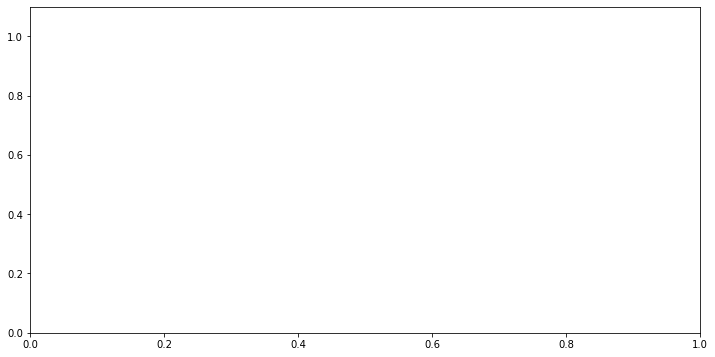

In [112]:
#pca = PCA().fit(data_rescaled)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 49, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 60, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


In [ ]:
#df_trans = pd.DataFrame(reduced, columns =df.columns)

In [113]:
# from sklearn.decomposition import PCA
 
# pca = PCA(n_components = 47)
 
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
 
# explained_variance = pca.explained_variance_ratio_


In [114]:
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [85]:
y_pred = classifier.predict(X_test)


In [86]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [142]:
logreg = LogisticRegression(verbose=1)
logreg.fit(X_train, y_train)

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\anoconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [143]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.57


In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


In [36]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.516 (0.025)
